# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taber
Processing Record 2 of Set 1 | al jawf
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | igarka
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | nueva gerona
Processing Record 10 of Set 1 | saint-philippe
Processing Record 11 of Set 1 | hammerfest
Processing Record 12 of Set 1 | iskateley
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | yibin
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | kampong thom
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | point pedro
Processing Record 19 of Set 1 | lysyye gory
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | cabedelo
Processing Record 22 of Set 1 | bilibino

Processing Record 39 of Set 4 | la passe
Processing Record 40 of Set 4 | mongo
Processing Record 41 of Set 4 | alaghsas
Processing Record 42 of Set 4 | vadso
Processing Record 43 of Set 4 | shingu
Processing Record 44 of Set 4 | westport
Processing Record 45 of Set 4 | balkh
Processing Record 46 of Set 4 | zhalantun
Processing Record 47 of Set 4 | aasiaat
Processing Record 48 of Set 4 | savelugu
Processing Record 49 of Set 4 | maturin
Processing Record 0 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 1 of Set 5 | phang nga
Processing Record 2 of Set 5 | mil'kovo
Processing Record 3 of Set 5 | ta`u
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | nar'yan-mar
Processing Record 6 of Set 5 | broome
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | kendari
Processing Record 9 of Set 5 | sarina
Processing Record 10 of Set 5 | greymouth
Processing Record 11 of Set 5 | praia da vitoria
Processing Record 12 of Set 5 | leb

Processing Record 30 of Set 8 | barguzin
Processing Record 31 of Set 8 | outjo
Processing Record 32 of Set 8 | kourou
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | viana do castelo
Processing Record 35 of Set 8 | katabu
Processing Record 36 of Set 8 | dali
Processing Record 37 of Set 8 | candido de abreu
Processing Record 38 of Set 8 | ibshaway
Processing Record 39 of Set 8 | quadrivio
Processing Record 40 of Set 8 | severnoye
Processing Record 41 of Set 8 | sangmelima
Processing Record 42 of Set 8 | sishilichengzi
City not found. Skipping...
Processing Record 43 of Set 8 | tanout
Processing Record 44 of Set 8 | itoman
Processing Record 45 of Set 8 | benghazi
Processing Record 46 of Set 8 | sao joao da barra
Processing Record 47 of Set 8 | pucon
Processing Record 48 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 49 of Set 8 | sinop
Processing Record 0 of Set 9 | barakani
Processing Record 1 of Set 9 | bamboo flat
Processing Record 2 o

Processing Record 17 of Set 12 | ada
Processing Record 18 of Set 12 | wajir
Processing Record 19 of Set 12 | saint-leu
Processing Record 20 of Set 12 | timimoun
Processing Record 21 of Set 12 | san jose del guaviare
Processing Record 22 of Set 12 | lerwick
Processing Record 23 of Set 12 | princeville
Processing Record 24 of Set 12 | bijie
Processing Record 25 of Set 12 | tralee
Processing Record 26 of Set 12 | canal winchester
Processing Record 27 of Set 12 | leogane
Processing Record 28 of Set 12 | dedougou
Processing Record 29 of Set 12 | butembo
Processing Record 30 of Set 12 | senanga
Processing Record 31 of Set 12 | kruisfontein
Processing Record 32 of Set 12 | cabanas
Processing Record 33 of Set 12 | decorah
Processing Record 34 of Set 12 | birobidzhan
Processing Record 35 of Set 12 | newman
Processing Record 36 of Set 12 | lloydminster
Processing Record 37 of Set 12 | xunchang
Processing Record 38 of Set 12 | smirnykh
Processing Record 39 of Set 12 | mayma
Processing Record 40 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taber,49.8167,-112.1518,263.16,89,100,1.03,CA,1707157952
1,al jawf,29.5000,38.7500,284.36,37,0,1.85,SA,1707157952
2,adamstown,-25.0660,-130.1015,296.68,85,100,7.45,PN,1707157952
3,college,64.8569,-147.8028,250.07,74,20,0.00,US,1707157952
4,grytviken,-54.2811,-36.5092,281.53,64,64,5.63,GS,1707157952


In [8]:
# I realized after extracting the data that I needed to subtract 273.15 to convert temperature from
# Kelvin to Celsius because I didn't specify in the query that I wanted the temperature in degrees Celsius,
# so rather than re-write the extraction protocol and extract new data, I modified the data I already had using:

city_data_df.loc[:, "Max Temp"] = city_data_df["Max Temp"].apply(lambda x: x - 273.15)

# And I found assistance for this procedure at
# https://stackoverflow.com/questions/33140496/how-to-substract-a-single-value-from-column-of-pandas-dataframe

# The conversion formula was provided by Google when searching "converting kelvin to celsius"

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taber,49.8167,-112.1518,-9.99,89,100,1.03,CA,1707157952
1,al jawf,29.5000,38.7500,11.21,37,0,1.85,SA,1707157952
2,adamstown,-25.0660,-130.1015,23.53,85,100,7.45,PN,1707157952
3,college,64.8569,-147.8028,-23.08,74,20,0.00,US,1707157952
4,grytviken,-54.2811,-36.5092,8.38,64,64,5.63,GS,1707157952


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taber,49.8167,-112.1518,-9.99,89,100,1.03,CA,1707157952
1,al jawf,29.5000,38.7500,11.21,37,0,1.85,SA,1707157952
2,adamstown,-25.0660,-130.1015,23.53,85,100,7.45,PN,1707157952
3,college,64.8569,-147.8028,-23.08,74,20,0.00,US,1707157952
4,grytviken,-54.2811,-36.5092,8.38,64,64,5.63,GS,1707157952


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

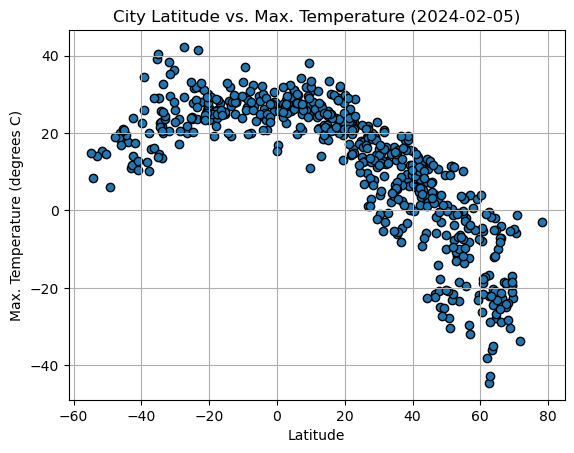

In [3]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
plt.scatter(latitude, max_temp, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max. Temperature (2024-02-05)")
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (degrees C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

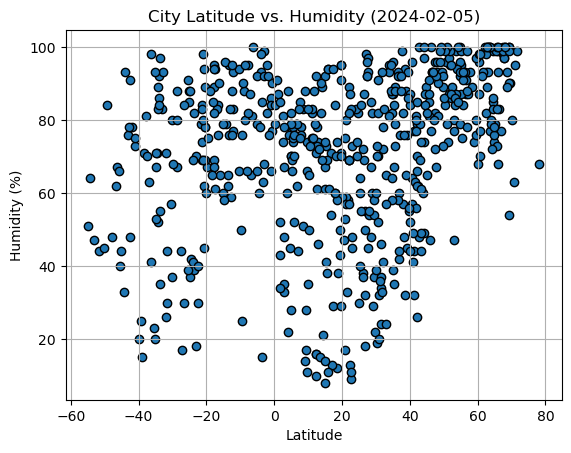

In [4]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-02-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

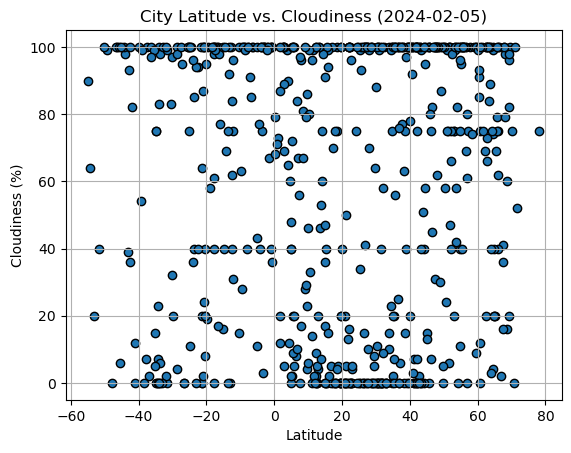

In [5]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-02-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

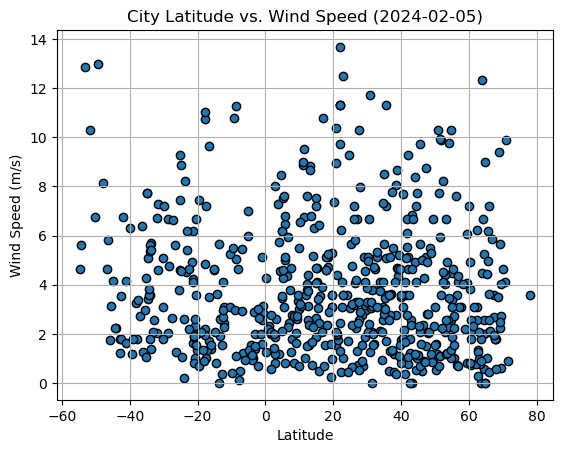

In [6]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-02-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def f(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize = 15, color = "red")
    plt.show()

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taber,49.8167,-112.1518,-9.99,89,100,1.03,CA,1707157952
1,al jawf,29.5000,38.7500,11.21,37,0,1.85,SA,1707157952
3,college,64.8569,-147.8028,-23.08,74,20,0.00,US,1707157952
5,igarka,67.4667,86.5833,-24.32,98,36,2.67,RU,1707157953
7,talnakh,69.4865,88.3972,-22.58,90,100,2.71,RU,1707157953


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,23.53,85,100,7.45,PN,1707157952
4,grytviken,-54.2811,-36.5092,8.38,64,64,5.63,GS,1707157952
6,waitangi,-43.9535,-176.5597,17.68,93,98,2.24,NZ,1707157953
9,saint-philippe,-21.3585,55.7679,23.77,74,64,4.25,RE,1707157954
12,blackmans bay,-43.0167,147.3167,11.07,76,39,1.79,AU,1707157955


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8706665633742849


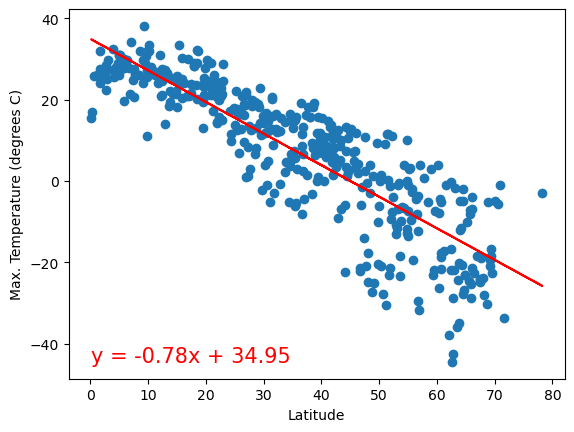

In [10]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (degrees C)")
f(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

The r-value is: 0.4615351909168675


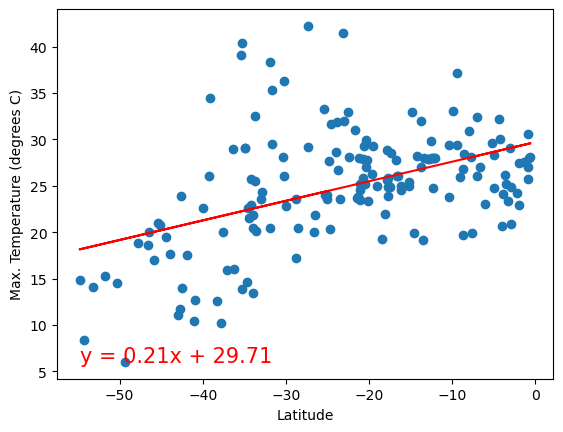

In [11]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature (degrees C)")
f(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:**
Data for the northern hemisphere shows strong negative correlation and data for the southern hemisphere shows weak positive correlation. The general trends, negative vs. positive, make sense. In the northern hemisphere, as the degrees increase, we're getting further from the equator, meaning less direct sunlight, thus lower temperatures overall. In the southern hemisphere, as the degrees increase (from most negative toward zero), we're getting closer to the equator, meaning more direct sunlight, thus higher temperatures overall. Perhaps the absolute value of the r-value for each is higher for the northern hemisphere because there are many more datapoints for the northern hemisphere (there are more cities in the northern hemisphere), thus more points to find a fit is leading to a better fit of the data. This is a reasonable assumption regarding the number of cities because a majority of the global population (upwards of 90%) resides in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4517764789985987


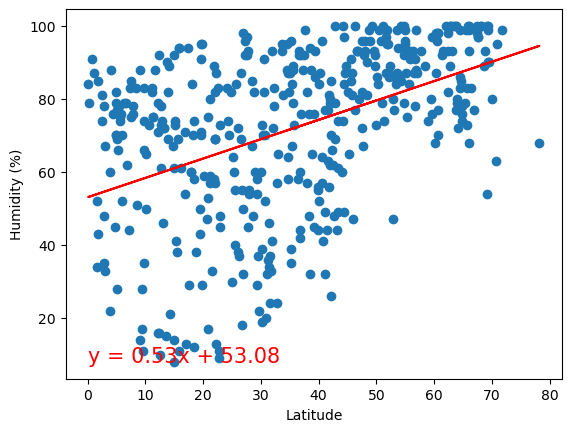

In [12]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
f(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The r-value is: 0.34942154478181064


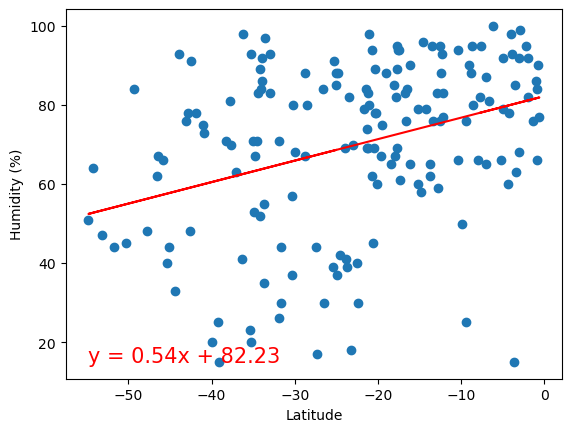

In [13]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
f(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** Both sets of data show weak positive correlation. Positivity makes sense for the southern hemisphere because as we approach the equator, we approach the region of the world with more tropical-like climates, meaning higher humidity. However, the positivity of the northern hemisphere's data doesn't immediately make sense given general knowledge/assumptions.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22428229295627652


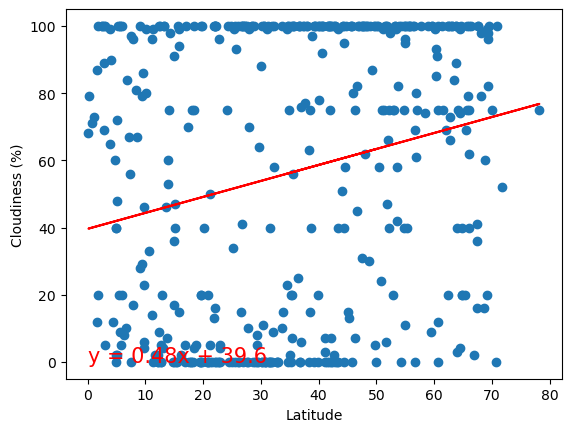

In [14]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
f(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The r-value is: 0.17648638711447193


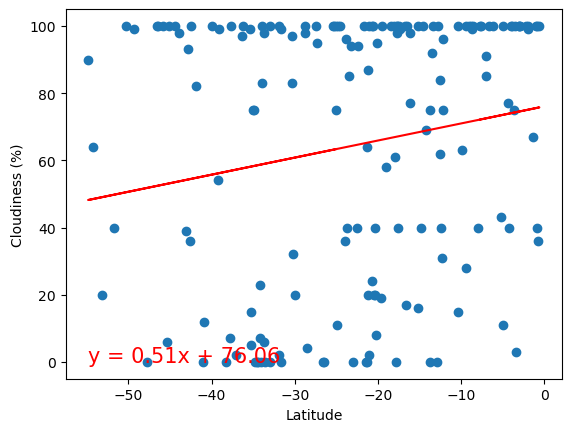

In [15]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
f(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** There is very poor to no correlation in the data for cloudiness vs. latitude for either hemisphere. This makes sense as there isn't a justifiable/scientific reason as to why cloudiness would increase or decrease as one moves closer to or further from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09269386335824037


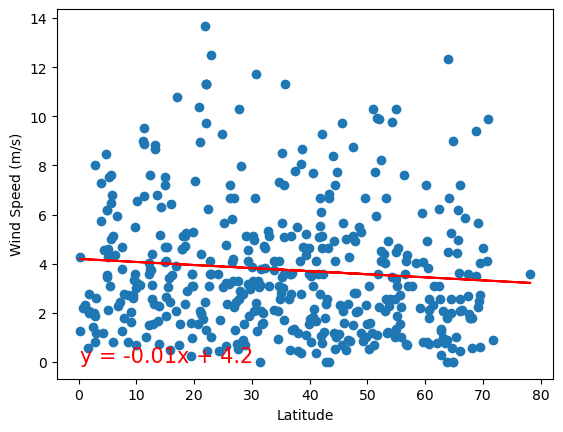

In [16]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
f(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The r-value is: -0.27996949678698724


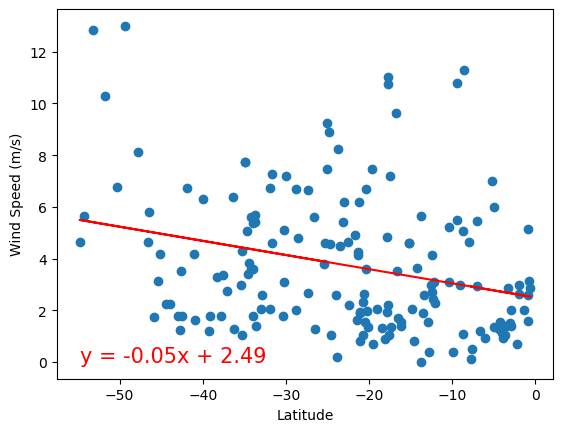

In [17]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
f(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Like the cloudiness data, there is very poor to no correlation in the data for wind speed vs. latitude for either hemisphere. This makes sense as there isn't a justifiable/scientific reason as to why wind speed would increase or decrease as one moves closer to or further from the equator.